<a href="https://colab.research.google.com/github/HenryZumaeta/py4cd_EPC2025/blob/main/C08/C08_Script01_WebScraping_xpath_beautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# stackoverflow

In [2]:
# Módulos a usar
import requests
from lxml import html

# Definamos la URL a scrapear
url = "https://stackoverflow.com/questions"

# Definir una url para las 15 últimas consultas/preguntas
url15 = "https://stackoverflow.com/questions?tab=newest&pagesize=15"

# Definir una url para las 30 últimas preguntas
url30 = "https://stackoverflow.com/questions?tab=newest&pagesize=30"

# Obtengamos respuesta del servidor
rspta = requests.get(url)

In [3]:
# atributo status_code
print("status code ", rspta.status_code)

status code  200


In [4]:
# Codificacion
print("codificacion : " , rspta.encoding)

codificacion :  utf-8


In [2]:
# Información almacenada en el objeto rspta
rspta.text

'\n<!DOCTYPE html>\n\n\n    <html itemscope itemtype="https://schema.org/CollectionPage"  class="html__responsive " lang="en">\n\n    <head>\n\n        <title>Newest Questions - Stack Overflow</title>\n        <link rel="shortcut icon" href="https://stackoverflow.com/Content/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">\n        <link rel="apple-touch-icon" href="https://stackoverflow.com/Content/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">\n        <link rel="image_src" href="https://stackoverflow.com/Content/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> \n        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">\n    <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">\n        <meta property="og:type" content= "website" />\n        <meta property="og:url" content="https://stackoverflow.com/questions"/>\n        <meta property

In [3]:
# parser lmxl
parser = html.fromstring(rspta.content)
parser

<Element html at 0x7f6666b6cb90>

# XPath (XML Path Language)

XPath ofrece ventajas clave:

- Precisión: Perminte seleccionar elementos por atributos (`@id`,`@class`,`@itemprop`), texto contenido, posición o relaciones padre/hijo.
- Flexibilidad: Puede encontrar elementos incluso si su clase cambia dinámicamente.
- Compatibilidad: Soportado por lxml, Selenium, Scrapy y otros framework de scraping.
- No depende de CSS: A diferencia de selectores de CSS, XPath puede hacer búsquedas basadas en texto, atributos, posición relativa y lógica condicional.

**SINTAXIS**
- `/html/body/div` : Ruta absoluta → El primer `div` dentro de `<body>` dentro de `<html>`.

- `//div` : Todos los elementos `<div>` en cualquier parte del documento.
- `//div[@class = "post"]` : Todos los `<div>` que tengan `class="post"`
- `//a[@href="/home/user/123"]` : Enlace con atributos `href` exacto.
- `//span[@itemprop="name"]/text()` : Texto contenido dentro de un `<span>` con `itemprop="name"`.
- `//div[1]` : Primer `<div>` hijo de su padre.
- `//div[last()]` : Último `<div>` hijo de su padre.
- `//a[contains(@class, "post-tag")]` : Elementos `<a>` cuya clase contenga `"post-tag"`.
- `//div[contains(text(), "Respuestas")]` : `<div>` que contenga el texto "Respuestas".


## Ejemplo: Obtención de los autores del post

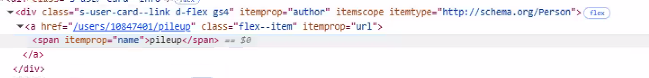

In [6]:
from lxml import html
import requests

url = "https://stackoverflow.com/questions"
response = requests.get(url)
parser = html.fromstring(response.content)

# Extracción de todos los nombes de los autores
autores = parser.xpath('.//div[@itemprop="author"]//span[@itemprop="name"]/text()')
print("Número de autores:", len(autores))

Número de autores: 50


In [8]:
#Constuyamos las url de las primeras 100 páginas
for p in range(2,101):
    url = "https://stackoverflow.com/questions?tab=newest&page="+str(p)
    print(url)

https://stackoverflow.com/questions?tab=newest&page=2
https://stackoverflow.com/questions?tab=newest&page=3
https://stackoverflow.com/questions?tab=newest&page=4
https://stackoverflow.com/questions?tab=newest&page=5
https://stackoverflow.com/questions?tab=newest&page=6
https://stackoverflow.com/questions?tab=newest&page=7
https://stackoverflow.com/questions?tab=newest&page=8
https://stackoverflow.com/questions?tab=newest&page=9
https://stackoverflow.com/questions?tab=newest&page=10
https://stackoverflow.com/questions?tab=newest&page=11
https://stackoverflow.com/questions?tab=newest&page=12
https://stackoverflow.com/questions?tab=newest&page=13
https://stackoverflow.com/questions?tab=newest&page=14
https://stackoverflow.com/questions?tab=newest&page=15
https://stackoverflow.com/questions?tab=newest&page=16
https://stackoverflow.com/questions?tab=newest&page=17
https://stackoverflow.com/questions?tab=newest&page=18
https://stackoverflow.com/questions?tab=newest&page=19
https://stackoverf

In [10]:
# Empaquetamos la función que permite obtener a todos los autores de una
# página de preguntas de stackoverflow.

def lista_autores_overflow(url):
    response = requests.get(url)
    parser = html.fromstring(response.content)

    # Extracción de todos lso nombres de autores
    autores = parser.xpath('.//div[@itemprop="author"]//span[@itemprop="name"]/text()')
    return autores

In [11]:
lista_autores_overflow("https://stackoverflow.com/questions?tab=newest&page=62")

['Huy Le',
 'bejgana driss',
 'MateuszGierczak',
 'Vicious',
 'Iñaki Goicolea Marin',
 'Jerome',
 'user44552',
 'Vishnu Kumar',
 'Sudhakar',
 'Samuel',
 'NOOB DEV',
 'Connor',
 'john houses',
 'user24327569',
 'LF-DevJourney',
 'randy pahang',
 'Meaulnes',
 'ULRAMAN TIGA',
 'Nicola Gigante',
 'HttpRafa',
 'Misko Mali',
 'Harry Nguyen',
 'BC TUBE',
 'sav',
 'Alban Deruaz',
 'Varun Gawande',
 'aurxc',
 'Eman',
 'Cubelated',
 'Iván Garza Bermea',
 'Sameer Ahmed',
 'Claris',
 'murat',
 'JT Shan',
 'Bossredman',
 'Sidharth Ramalingam',
 'glades',
 'Charmi',
 'Noitidart',
 'Toxic Prince',
 'AllodyUser ',
 'Abu Sofian',
 'Rishabh Rawat',
 'Kinjal Radadiya',
 'Kyle',
 'Fausto A. A. Barbuto',
 'Qwertie',
 'user31112632',
 'Raja',
 'OMGPOP']

In [13]:
# Obtengamos todas las preguntas de una url para luego obtener
# enlace, autor y los tags

preguntas = parser.xpath('//div[@class="bb bc-black-200"]')
len(preguntas)

50

In [25]:
from enum import auto
for i, pregunta in enumerate(preguntas, 1):
    print(f"=== Pregunta {i} ===")

    # Enlace del título
    enlace_elem = pregunta.xpath('.//h3[@class="s-post-summary--content-title"]//a/@href')
    #print("https://stackoverflow.com" + enlace_elem[0])
    enlace = enlace_elem[0] if enlace_elem else ""
    enlace_completo = "https://stackoverflow.com" + enlace if enlace else ""
    #print(enlace_completo)

    # Nombre del autor
    autor_elem = pregunta.xpath('.//div[@itemprop="author"]//span[@itemprop="name"]/text()')
    autor = autor_elem[0] if autor_elem else "ANÓNIMO"
    #print(autor)

    # Etiquetas para cada pregunta
    tags_elem = pregunta.xpath('.//a[contains(@class, "post-tag")]')
    #print(tags_elem)
    tags = [tag.text_content() for tag in tags_elem]
    #print(tags)

    # Mostremos la información obtenida
    print(f"Enlace: {enlace_completo}")
    print(f"Autor: {autor}")
    print(f"Etiquetas: {', '.join(tags)}")
    print("\n")


=== Pregunta 1 ===
Enlace: https://stackoverflow.com/questions/79821748/progress-tracking-on-form-with-qradiobuttons
Autor: David Siret Marqués
Etiquetas: python, pyside6


=== Pregunta 2 ===
Enlace: https://stackoverflow.com/questions/79821747/should-i-use-both-aria-errormessage-and-aria-describedby-with-the-same-value
Autor: Marc PIERRON
Etiquetas: html, vue.js, accessibility


=== Pregunta 3 ===
Enlace: https://stackoverflow.com/questions/79821740/changing-the-frequency-in-vtx-akk-alpha-via-esp32
Autor: Ð¡ÐµÑÐ³ÑÐ¹ Ð¡ÐµÑÐ³ÑÐ¹Ð¾Ð²Ð¸Ñ
Etiquetas: esp32


=== Pregunta 4 ===
Enlace: https://stackoverflow.com/questions/79821732/does-every-dag-have-a-spanning-tree-with-only-forward-edges
Autor: conjuncts
Etiquetas: networkx, graph-theory, directed-acyclic-graphs


=== Pregunta 5 ===
Enlace: https://stackoverflow.com/questions/79821724/how-to-set-translatex-based-on-the-htmls-dir-attribute
Autor: pileup
Etiquetas: css


=== Pregunta 6 ===
Enlace: https://stackoverflow.com/questions/7982

# Beautiful Soup

In [5]:
import requests
from bs4 import BeautifulSoup

url = "https://stackoverflow.com/questions"
response = requests.get(url)

if response.status_code == 200:
  soup = BeautifulSoup(response.text, "html.parser")
  preguntas = soup.find_all("div", class_ = "s-post-summary")

  # Para cada pregunta
  for pregunta in preguntas:
    # titulo
    titulo_elem = pregunta.find("h3", class_ = "s-post-summary--content-title")
    # print("titulo_elem ", titulo_elem.get_text())
    titulo = titulo_elem.get_text(strip= True) if titulo_elem else "Sin Titulo"
    # print("titulo : ", titulo)

    # Enlace
    enlace_elem = pregunta.find("a", href = True)
    enlace = "https://stackoverflow.com" + enlace_elem["href"]  if enlace_elem else ""
    # print("enlace : ", enlace)

    # Autor
    autor_elem = pregunta.find("div", itemprop= "author").find("span", itemprop = "name")
    # print(autor_elem.get_text())
    autor = autor_elem.get_text() if autor_elem else "Anonimo"

    # Votos
    votos_elem = pregunta.find("span", class_ = "s-post-summary--stats-item-number")
    # print(votos_elem.get_text())
    votos = int(votos_elem.get_text()) if votos_elem else "0"

    # etiquetas
    tags = [tag.get_text() for tag in pregunta.find_all("a", class_="post-tag")]
    # print(tags)

    print("---------------------------------------------------------------------")
    print(f"Titulo {titulo}")
    print(f"Enlace {enlace}")
    print(f"Autor {autor}")
    print(f"Votos {votos}")
    print(f"Etiquetas {tags}")
    print("---------------------------------------------------------------------\n")

---------------------------------------------------------------------
Titulo How to configure Nginx so that X.509 authentication implemented with Spring Security works correctly?
Enlace https://stackoverflow.com/questions/79821846/how-to-configure-nginx-so-that-x-509-authentication-implemented-with-spring-secu
Autor Hailong Liu
Votos 0
Etiquetas ['nginx', 'spring-security']
---------------------------------------------------------------------

---------------------------------------------------------------------
Titulo Thin Font Rendering Flutter
Enlace https://stackoverflow.com/questions/79821840/thin-font-rendering-flutter
Autor Ethan Chan
Votos 0
Etiquetas ['flutter', 'qt', 'fonts', 'text-rendering']
---------------------------------------------------------------------

---------------------------------------------------------------------
Titulo API returns nothing
Enlace https://stackoverflow.com/questions/79821829/api-returns-nothing
Autor João Pedro Monteiro
Votos -1
Etiquetas ['

# Google Scholar

In [6]:
# Descarguemos el archivo de user-agents
!wget https://gist.githubusercontent.com/pzb/b4b6f57144aea7827ae4/raw/cf847b76a142955b1410c8bcef3aabe221a63db1/user-agents.txt

--2025-11-17 01:39:41--  https://gist.githubusercontent.com/pzb/b4b6f57144aea7827ae4/raw/cf847b76a142955b1410c8bcef3aabe221a63db1/user-agents.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110531 (108K) [text/plain]
Saving to: ‘user-agents.txt’

user-agents.txt     100%[===================>] 107.94K  --.-KB/s    in 0.02s   

2025-11-17 01:39:41 (4.22 MB/s) - ‘user-agents.txt’ saved [110531/110531]



In [7]:
import requests
from bs4 import BeautifulSoup

# busqueda
search_query = "deep learning"
url = "https://scholar.google.com/scholar?q=" + search_query



# Seleccionar un header de manera aleatoria
with open("/content/user-agents.txt", "r") as f:
  lines = f.readlines()

import random as rnd
n = len(lines)
headers = {"user-agent" : lines[rnd.randint(0,n+1)][:-1]}
print("Cabecera : ", headers)
response = requests.get(url, headers = headers)
response.status_code

Cabecera :  {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.155 Safari/537.36'}


403

In [8]:
response.status_code

403